# CSMODEL Machine Project (Phase 1) ☕✨
This Jupyter Notebook was made in compliance with the requirements set by the course Statistical Modelling and Simulation (CSMODEL). 

This machine project was prepared by the following students from section S16:
- Filipino, Eunice Marble R.
- Lazaro, Heisel Janine C.
- Punsalan, Emmanuel Gerald G.
- Wee, Justine Erika D.


# Import Libraries ⬇️

The following libraries are imported to provide essential functionalities for data processing, analysis, and visualization throughout this project:

In [92]:
%pip install openpyxl
%pip install scipy
%pip install seaborn
%pip install rapidfuzz

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from rapidfuzz import process, fuzz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Data Description ℹ️✨
The [Coffee Bean Sales Dataset](https://www.kaggle.com/datasets/saadharoon27/coffee-bean-sales-raw-dataset/data) provides comprehensive insights of certain coffee bean orders from 2019-2022. It contains detailed information on coffee orders, customer profiles and product details. The dataset is divided into three worksheets, providing specific information about orders, customers and products. The orders worksheet reflects the coffee transactions made by customers. The customers worksheet contains specific details on the customers. Lastly, the products worksheet details each coffee product.

### How the data was collected

The dataset was acquired from [Kaggle](https://www.kaggle.com) which houses datasets that may be from open sources, web scraping, or simulations. It is not outwardly stated how the coffee bean sales dataset was gathered, but it can be assumed that it was artificially generated for educational purposes due to the lack of details and metadata surrounding the orders.

### Potential Implications

As the data was collected through unknown sources, there are potential implications on how information was recorded. The lack of standardization across dataset fields may lead to discrepancies, inconsistencies, or misleading conclusions during data analysis. Additionally, the lack of metadata challenges to determine the scope of the dataset—increasing the risk of sampling bias. It also imposes constraints in preprocessing since the dataset was provided in a pre-cleaned format; hence, further restricting the accuracy and relevance of the insights that will be generated.

### Dataset Overview (Structure and Attributes)

The dataset is divided into three worksheets, which are the following:

📃 **Orders:** Consists of **1,000 observations** and **9 variables**, where each observation represents an order. The attributes of which include:

| **Attribute** | **Description**                              |
|---------------|----------------------------------------------|
| **Order ID**  | A unique identifier for each order           |
| **Order Date**| The date the order was placed                |
| **Customer ID** | A reference to the customer who placed the order |
| **Product ID** | A reference to the product ordered          |
| **Quantity**  | The number of units ordered                  |

🧑 **Customers:** Consists of **1,000 observations** and **9 variables**, where each observation represents a distinct customer. The attributes of which include:

| **Attribute**     | **Description**                        |
|-------------------|----------------------------------------|
| **Customer ID**   | A unique identifier for each customer  |
| **Customer Name** | The full name of the customer          |
| **Email Address** | Contact email of the customer          |
| **Phone Number**  | Customer’s phone contact               |
| **Address Line 1**  | Primary street address of the customer |
| **City**            | City of the customer’s address         |
| **Country**         | Country of residence                   |
| **Postcode**        | Postal/ZIP code of the customer’s address |
| **Loyalty Card**    | Indicates whether the customer has a loyalty card (Yes/No) |

☕ **Products:** Consists of **48 observations** and **7 variables**, where each observation represents a unique coffee product. The attributes of which include:

| **Attribute**     | **Description**                                     |
|-------------------|--------------------------------------------------- |
| **Product ID**    | A unique identifier for each product                |
| **Coffee Type**   | The blend or type of coffee (e.g., Arabica, Robusta)|
| **Roast Type**    | The level of roast (e.g., light, medium, dark)      |
| **Size**          | Packaging size of the product                      |
| **Unit Price**    | Retail price per unit                              |
| **Price per 100g**| Standardized pricing for comparison                |
| **Profit**        | Profitability of each product                      |

# Reading the Dataset 📝

We can now load in the dataset!

In [93]:
# Reading the Excel file
file_path = 'Coffee Bean Dataset.xlsx'

# Loading each worksheet into a separate DataFrame
orders = pd.read_excel(file_path, sheet_name = 'orders')
customers = pd.read_excel(file_path, sheet_name = 'customers')
products = pd.read_excel(file_path, sheet_name = 'products')

We should take a peek into the three worksheets to confirm our loading worked... 👀

In [94]:
orders.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
customers.head()

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,73342-18763-UW,Piotr Bote,pbote1@yelp.com,+353 (913) 396-4653,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,71253-00052-RN,Dene Azema,dazema3@facebook.com,+1 (217) 418-0714,27 Maywood Place,Springfield,United States,62711,Yes
4,23806-46781-OU,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No


In [96]:
products.head()

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965
1,A-L-0.5,Ara,L,0.5,7.770,1.5540,0.69930
2,A-L-1,Ara,L,1.0,12.950,1.2950,1.16550
3,A-L-2.5,Ara,L,2.5,29.785,1.1914,2.68065
4,A-M-0.2,Ara,M,0.2,3.375,1.6875,0.30375


Eureka! The Coffee Bean Dataset has loaded into our Notebook. 

But each worksheet only gives us partial information about the data... So, let's join the worksheets together to gain more insights! 🔍

In [97]:
# Merging Orders with Customers on 'Customer ID'
orders_customers = pd.merge(orders, customers, on = 'Customer ID', how = 'left')

# Merging the result with Products on 'Product ID'
coffee_df = pd.merge(orders_customers, products, on = 'Product ID', how = 'left')

Let's take another peek but now into the merged dataset.

In [98]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         1000 non-null   object        
 1   Order Date       1000 non-null   datetime64[ns]
 2   Customer ID      1000 non-null   object        
 3   Product ID       1000 non-null   object        
 4   Quantity         1000 non-null   int64         
 5   Customer Name_x  0 non-null      float64       
 6   Email_x          0 non-null      float64       
 7   Country_x        0 non-null      float64       
 8   Coffee Type_x    0 non-null      float64       
 9   Roast Type_x     0 non-null      float64       
 10  Size_x           0 non-null      float64       
 11  Unit Price_x     0 non-null      float64       
 12  Sales            0 non-null      float64       
 13  Customer Name_y  1000 non-null   object        
 14  Email_y          794 non-null    object  

We're all set! We can now proceed to cleaning the dataset. 🫧

# Data Cleaning 🧹✨ 

Before performing analysis, it is essential to clean the dataset so we ensure accuracy and reliability of results. We'll be handling variables and values with **multiple representations**, **incorrect datatypes**, **missing data**, **duplicate data**, **inconsistent formatting**, and **outliers**.

Let's look at the dataset and its variables again! 

In [99]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         1000 non-null   object        
 1   Order Date       1000 non-null   datetime64[ns]
 2   Customer ID      1000 non-null   object        
 3   Product ID       1000 non-null   object        
 4   Quantity         1000 non-null   int64         
 5   Customer Name_x  0 non-null      float64       
 6   Email_x          0 non-null      float64       
 7   Country_x        0 non-null      float64       
 8   Coffee Type_x    0 non-null      float64       
 9   Roast Type_x     0 non-null      float64       
 10  Size_x           0 non-null      float64       
 11  Unit Price_x     0 non-null      float64       
 12  Sales            0 non-null      float64       
 13  Customer Name_y  1000 non-null   object        
 14  Email_y          794 non-null    object  

There's a lot of redundant variables we don't need as a result of merging. We can drop those. Goodbye! 👋

In [100]:
# Dropping the useless columns
columns_to_drop = [
    'Customer Name_x', 
    'Email_x', 
    'Country_x', 
    'Coffee Type_x', 
    'Roast Type_x', 
    'Size_x', 
    'Unit Price_x', 
    'Sales']
clean_coffee_df = coffee_df.drop(columns = columns_to_drop)

# Renaming remaining columns for clarity
clean_coffee_df = clean_coffee_df.rename(columns = {
    'Customer Name_y': 'Customer Name',
    'Email_y': 'Email',
    'Country_y': 'Country',
    'Coffee Type_y': 'Coffee Type',
    'Roast Type_y': 'Roast Type',
    'Size_y': 'Size',
    'Unit Price_y': 'Unit Price'
})

clean_coffee_df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Rob,M,1.0,9.950,0.9950,0.5970
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Exc,M,0.5,8.250,1.6500,0.9075
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes,Ara,L,1.0,12.950,1.2950,1.1655
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Exc,M,1.0,13.750,1.3750,1.5125
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Rob,L,2.5,27.485,1.0994,1.6491


Looking good so far! We can now proceed to the actual cleaning. 

### Incorrect Datatypes

Incorrect Datatypes happen when the type of data stored in a column doesn’t match what it should be for correct analysis or operations. 

Strings shouldn't be stored as Floats! Dates shouldn't be stored as plain text... We might run into problems for computing.

Here's code to generate table with their current datatypes:

In [101]:
# Preparing the table data
data = []

for column in clean_coffee_df.columns:
    # Drop NA to avoid errors when accessing the first element
    first_value = clean_coffee_df[column].dropna().iloc[0] if not clean_coffee_df[column].dropna().empty else None
    
    data.append({
        'Attribute': column,
        'Type': str(clean_coffee_df[column].dtype)
    })

# Converting to DataFrame for display
dtype_table = pd.DataFrame(data)
print(dtype_table)

         Attribute            Type
0         Order ID          object
1       Order Date  datetime64[ns]
2      Customer ID          object
3       Product ID          object
4         Quantity           int64
5    Customer Name          object
6            Email          object
7     Phone Number          object
8   Address Line 1          object
9             City          object
10         Country          object
11        Postcode          object
12    Loyalty Card          object
13     Coffee Type          object
14      Roast Type          object
15            Size         float64
16      Unit Price         float64
17  Price per 100g         float64
18          Profit         float64


But it seems like some of the datatypes aren't specific enough. Let's look at the ones that stand out! 🧍

#### Order, Customer, & Product ID

Unique identifiers like the Order ID, Customer ID, and Product ID are stored as objects, specifically strings. No problems here!

In [102]:
print(type(clean_coffee_df['Order ID'].iloc[0]))
print(type(clean_coffee_df['Customer ID'].iloc[0]))
print(type(clean_coffee_df['Product ID'].iloc[0]))

<class 'str'>
<class 'str'>
<class 'str'>


#### Order Date

Order Dates are stored as objects, specifically a datetime. All good on this end!

In [103]:
print(type(clean_coffee_df['Order Date'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


On that note, textual information like the Customer Name, Email, Address Line 1, City, Country, Phone Numbers, and Postcodes should be strings also.

In [104]:
print(type(clean_coffee_df['Customer Name'].iloc[0]))
print(type(clean_coffee_df['Email'].iloc[0]))
print(type(clean_coffee_df['Address Line 1'].iloc[0]))
print(type(clean_coffee_df['City'].iloc[0]))
print(type(clean_coffee_df['Country'].iloc[0]))
print(type(clean_coffee_df['Phone Number'].iloc[0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


#### Postcode

Oh no! All the other variables are correct but Postcodes are represented as ints, so let's fix that!

In [105]:
clean_coffee_df['Postcode'] = clean_coffee_df['Postcode'].astype(str)

In [106]:
print(type(clean_coffee_df['Postcode'].iloc[0]))

<class 'str'>


#### Loyalty Card

The Loyalty Card variable is filled with "Yes" and "No", but it would be much better to analyze boolean values. Would that be true or false?

In [107]:
clean_coffee_df['Loyalty Card'] = clean_coffee_df['Loyalty Card'].map({'Yes': True, 'No': False}).astype(bool)

In [108]:
print(type(clean_coffee_df['Loyalty Card'].iloc[0]))

<class 'numpy.bool'>


#### Unit Price, Price per 100g, Profit, Size, and Quantity

Numerical information like Unit Price, Price per 100g, Profit, Size, and Quantity are already floats and int respectively. No need for corrections!

In [109]:
print(type(clean_coffee_df['Unit Price'].iloc[0]))
print(type(clean_coffee_df['Price per 100g'].iloc[0]))
print(type(clean_coffee_df['Profit'].iloc[0]))
print(type(clean_coffee_df['Size'].iloc[0]))
print(type(clean_coffee_df['Quantity'].iloc[0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>


#### Coffee Type & Roast Type

Information that uses the same set of values can be identified into categories. For the Coffee Type, and Roast Type, we can convert them to the category datatype.

In [110]:
clean_coffee_df['Coffee Type'] = clean_coffee_df['Coffee Type'].astype('category')
clean_coffee_df['Roast Type'] = clean_coffee_df['Roast Type'].astype('category')

In [111]:
print(clean_coffee_df['Coffee Type'].dtype)
print(clean_coffee_df['Roast Type'].dtype)

category
category


#### Checking

Let's run the code to check all the datatypes again...

In [112]:
# Preparing the table data
data = []

for column in clean_coffee_df.columns:
    # Drop NA to avoid errors when accessing the first element
    first_value = clean_coffee_df[column].dropna().iloc[0] if not clean_coffee_df[column].dropna().empty else None
    python_type = type(first_value).__name__ if first_value is not None else 'NoneType'
    
    data.append({
        'Attribute': column,
        'Pandas Type': str(clean_coffee_df[column].dtype),
        'Python Type': python_type
    })

# Converting to DataFrame for display
dtype_table = pd.DataFrame(data)
print(dtype_table)


         Attribute     Pandas Type Python Type
0         Order ID          object         str
1       Order Date  datetime64[ns]   Timestamp
2      Customer ID          object         str
3       Product ID          object         str
4         Quantity           int64       int64
5    Customer Name          object         str
6            Email          object         str
7     Phone Number          object         str
8   Address Line 1          object         str
9             City          object         str
10         Country          object         str
11        Postcode          object         str
12    Loyalty Card            bool        bool
13     Coffee Type        category         str
14      Roast Type        category         str
15            Size         float64     float64
16      Unit Price         float64     float64
17  Price per 100g         float64     float64
18          Profit         float64     float64


We're all set, the datatypes now fit the variables! Good job! 👏

### Multiple Representations

Some observations may have the same value but presented differently. That's what we call "Multiple Representations".

Just as an example, there are observations in Country "U.S.A", "United States of America", and "USA". That's too many! We have make America consistent again! 🦅

Only the variables categorical in nature or text-based should be checked, namely the following:
- Coffee Type
- Roast Type
- Country
- City
- Customer Name 
- Email
- Loyalty Card

#### Coffee Type & Roast Type

We can start with the categorical coffee bean variables since they're expected to be consistent all throughout.

In [113]:
print(clean_coffee_df['Coffee Type'].unique())
print(clean_coffee_df['Roast Type'].unique())

['Rob', 'Exc', 'Ara', 'Lib']
Categories (4, object): ['Ara', 'Exc', 'Lib', 'Rob']
['M', 'L', 'D']
Categories (3, object): ['D', 'L', 'M']


There are 4 distinct objects for Coffee Type and there are no duplicates among the values found, same goes with the Roast Type with 3. So, we can conclude that there are no multiple representations.

#### Country

Same logic goes for the Country variable.

In [114]:
print(clean_coffee_df['Country'].unique())
print(clean_coffee_df['Country'].nunique())

['United States' 'Ireland' 'United Kingdom']
3


#### City

It seems like there are so many values in the City variable! Unlike previous variables, we can't manually inspect the list this long! ❌

In [115]:
print(clean_coffee_df['City'].nunique())

375


In [116]:
clean_coffee_df['City'].value_counts()

City
Washington       26
New York City    17
Houston          15
Oklahoma City    15
Birmingham       13
                 ..
Sutton            1
New Brunswick     1
Valleymount       1
Alhambra          1
Wirral            1
Name: count, Length: 375, dtype: int64

Fuzzy matching can be used to find potential values that are represented differently. ✅

In [117]:
# Making City names lowercase to compare them without case-sensitivity
cities = clean_coffee_df['City'].str.lower().unique()

for city in cities:
    matches = process.extract(city, cities, scorer = fuzz.ratio, limit = 5)
    for match, score, _ in matches:
        if city != match and score > 85:
            print(f"{city} ↔ {match}: {score}")

scranton ↔ canton: 85.71428571428572
charleston ↔ charlton: 88.88888888888889
nashville ↔ asheville: 88.88888888888889
canton ↔ scranton: 85.71428571428572
eaton ↔ seaton: 90.9090909090909
reston ↔ preston: 92.3076923076923
charlton ↔ carlton: 93.33333333333333
charlton ↔ charleston: 88.88888888888889
charlton ↔ halton: 85.71428571428572
asheville ↔ nashville: 88.88888888888889
preston ↔ reston: 92.3076923076923
seaton ↔ eaton: 90.9090909090909
halton ↔ charlton: 85.71428571428572
carlton ↔ charlton: 93.33333333333333
salinas ↔ sallins: 85.71428571428572
sallins ↔ salinas: 85.71428571428572


The code only returned City values with names spelled closely, but there's not one same value represented in multiple ways! So, all is well here!

#### Customer Name

There are too many Customer Names too! 🧑‍🦰🧑‍🦱🧔

What we can do is make a DataFrame with the normalized names, then compare the original data with that.

In [118]:
# Creating a temporary normalized version
normalized_names = clean_coffee_df['Customer Name'].str.strip().str.title()

# Grouping by normalized names then counting unique representations
name_variations = clean_coffee_df.groupby(normalized_names)['Customer Name'].nunique()

# Showing only names with multiple representations
multiple_representations = name_variations[name_variations > 1]

Refer to the block of code below. 

If anything appears, there are multiple variants of a name. If not, all Customer Names are represented in just one way.

In [119]:
# Displaying the cleaned name and its variants if they exist
for name in multiple_representations.index:
    variants = clean_coffee_df.loc[normalized_names == name, 'Customer Name'].unique()
    print(f"{name} → {variants}")

Now we can see that all Customer Names have no repeats with a different variation!

#### Email

In [120]:
# Making Email Addresses lowercase to compare them without case-sensitivity
emails = clean_coffee_df['Email'].str.lower().unique()

for email in emails:
    matches = process.extract(email, emails, scorer = fuzz.ratio, limit = 5)
    for match, score, _ in matches:
        if email != match and score > 85:
            print(f"{email} ↔ {match}: {score}")

egrise2g@cargocollective.com ↔ dfrieseq@cargocollective.com: 85.71428571428572
dfrieseq@cargocollective.com ↔ egrise2g@cargocollective.com: 85.71428571428572


#### Loyalty Card

Lastly, we check if the Loyalty Card Ownership variable has any other values than "True" or "False".

In [121]:
print(clean_coffee_df['Loyalty Card'].unique())

[ True False]


In terms of multiple representations, our dataset has been cleaned! Wahoo! ✨

### Missing Data

Some variables may have unfilled values. The lack of values may make some algorithms and functions produce errors, sway bias, or make for inaccurate conclusions.

We can't allow that to happen! Let's fill in the gaps! 🕳️🧑‍🦯

Have this code snippet to check which variables have null values in their observations.

In [122]:
# Showing the number of missing values per column
missing_data = clean_coffee_df.isnull().sum()

# Displaying only columns with missing data
print(missing_data[missing_data > 0])

Email           206
Phone Number    135
dtype: int64


The only variables with null values are the Phone Number and Email of the customers.

There are three approaches we can go with regarding these values:
1. Dropping the columns. If they aren't be essential.
2. Leaving them as is. If they won't be used.
3. Replacing with "Unknown" or other null-indicating strings. If they might be used or might be filled up for later.

As a bit of a spoiler, this notebook will focus primarily on marketing and identifying trends. 

Let's just say the company which needs the data analyses uses the Email and Phone Numbers to send newsletters and text notifications for upcoming deals and product promotions. 📈📉

This means we will need the contacts of the customers in the future, meaning we'll go with option 3 and replace the null values with "Unknown".

In [123]:
# Replacing empty strings with NaN first
clean_coffee_df['Phone Number'] = clean_coffee_df['Phone Number'].replace(r'^\s*$', np.nan, regex=True)
clean_coffee_df['Email'] = clean_coffee_df['Email'].replace(r'^\s*$', np.nan, regex=True)

# Replacing NaN values with unknown
clean_coffee_df[['Phone Number', 'Email']] = clean_coffee_df[['Phone Number', 'Email']].fillna("Unknown")

In [124]:
# Showing the number of missing values per column
missing_data = clean_coffee_df.isnull().sum()

# Displaying only columns with missing data
print(missing_data[missing_data > 0])

Series([], dtype: int64)


That's all for the missing data! I hope we didn't miss anything. 😆

### Duplicate Data

Data may have been recorded multiple times but have almost the exact same values.

We have to look out for these since, again, they might skew our analysis and make it inaccurate.

Use the following code snippet to check whether there are duplicate observations for the Product and Order ID since these should not repeat. ✌️

In [125]:
print((clean_coffee_df.duplicated(subset = ['Order ID', 'Product ID'])).sum())
print((clean_coffee_df.duplicated(subset = ['Customer Name', 'Product ID'])).sum())

1
2


It looks like there are duplicates, let's inspect them:

In [126]:
clean_coffee_df.duplicated(subset = ['Order ID', 'Product ID']).sum()
clean_coffee_df[clean_coffee_df.duplicated(subset=['Order ID', 'Product ID'], keep = False)]

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
197,NOP-21394-646,2021-05-23,16982-35708-BZ,L-D-2.5,2,Nealson Cuttler,ncuttler5g@parallels.com,Unknown,1 Melvin Circle,Washington,United States,20535,False,Lib,D,2.5,29.785,1.1914,3.87205
198,NOP-21394-646,2021-05-23,16982-35708-BZ,L-D-2.5,3,Nealson Cuttler,ncuttler5g@parallels.com,Unknown,1 Melvin Circle,Washington,United States,20535,False,Lib,D,2.5,29.785,1.1914,3.87205


In [127]:
clean_coffee_df.duplicated(subset = ['Customer Name', 'Product ID']).sum()
clean_coffee_df[clean_coffee_df.duplicated(subset = ['Customer Name', 'Product ID'], keep=False)]

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
197,NOP-21394-646,2021-05-23,16982-35708-BZ,L-D-2.5,2,Nealson Cuttler,ncuttler5g@parallels.com,Unknown,1 Melvin Circle,Washington,United States,20535,False,Lib,D,2.5,29.785,1.1914,3.87205
198,NOP-21394-646,2021-05-23,16982-35708-BZ,L-D-2.5,3,Nealson Cuttler,ncuttler5g@parallels.com,Unknown,1 Melvin Circle,Washington,United States,20535,False,Lib,D,2.5,29.785,1.1914,3.87205
953,PJS-30996-485,2022-01-21,86579-92122-OC,A-L-0.2,1,Brenn Dundredge,Unknown,+1 (405) 369-5173,5 Morrow Street,Oklahoma City,United States,73129,True,Ara,L,0.2,3.885,1.9425,0.34965
958,NCH-55389-562,2019-04-27,86579-92122-OC,A-L-0.2,2,Brenn Dundredge,Unknown,+1 (405) 369-5173,5 Morrow Street,Oklahoma City,United States,73129,True,Ara,L,0.2,3.885,1.9425,0.34965


It seems like the first Customer was genuinely duplicated, while the second just ordered in different times.

We'll handle the first only.

We can aggregate their two orders into just one.

In [128]:
clean_coffee_df = clean_coffee_df.groupby(['Order ID', 'Product ID'], as_index = False).agg({
    'Quantity': 'sum',
    'Profit': 'sum',
    'Customer ID': 'first',
    'Customer Name': 'first',
    'Email': 'first',
    'Phone Number': 'first',
    'Address Line 1': 'first',
    'City': 'first',
    'Country': 'first',
    'Postcode': 'first',
    'Loyalty Card': 'first',
    'Coffee Type': 'first',
    'Roast Type': 'first',
    'Size': 'first',
    'Unit Price': 'first',
    'Price per 100g': 'first',
    'Order Date': 'first'
})

Let's check again if the duplicate is still there!

In [129]:
duplicates = clean_coffee_df.duplicated(subset = ['Order ID', 'Product ID'], keep = False)
clean_coffee_df[duplicates].sort_values(by = ['Order ID', 'Product ID'])

,Order ID,Product ID,Quantity,Profit,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Order Date


No more duplicates! 🤵🤵

### Inconsistent Formatting

Sometimes, values entered manually can be formatted differently. We need to make sure that strings and categorical data have the same cases, spelling, formats, and no extra spaces.

Namely the following variables should be formatted:
- Order ID
- Customer ID
- Product ID
- Coffee Type
- Roast Type 
- City
- Country
- Customer Name
- Email
- Phone Number
- Address Line 1
- Postcode

Here's code for removing spaces:

In [130]:
# Removing from objects
for col in clean_coffee_df.select_dtypes(include = 'object').columns:
    clean_coffee_df[col] = clean_coffee_df[col].str.strip()

# Removing from IDs
for col in ['Order ID', 'Customer ID', 'Product ID', 'Phone Number', 'Address Line 1']:
    clean_coffee_df[col] = clean_coffee_df[col].str.strip()

# Removing fromPostcodes
clean_coffee_df['Postcode'] = clean_coffee_df['Postcode'].str.replace(r'\s+', '', regex = True)

Here's code for converting to Title Case and lowercase respectively:

In [131]:
# Title Case
clean_coffee_df['Customer Name'] = clean_coffee_df['Customer Name'].str.title()
clean_coffee_df['City'] = clean_coffee_df['City'].str.title()
clean_coffee_df['Country'] = clean_coffee_df['Country'].str.title()
clean_coffee_df['Coffee Type'] = clean_coffee_df['Coffee Type'].str.title()
clean_coffee_df['Roast Type'] = clean_coffee_df['Roast Type'].str.title()

# lowercase
clean_coffee_df['Email'] = np.where(clean_coffee_df['Email'] == 'Unknown', 'Unknown', clean_coffee_df['Email'].str.lower())

And lastly, here's the code for formatting Phone Numbers to be consistent:

In [132]:
import re

def format_phone_number(phone):
    # Removing all non-digit characters except + at start
    phone = re.sub(r'[^\d+]', '', phone)

    # If no country code, default to +1 (adjust if you have better rules)
    if not phone.startswith('+'):
        phone = '+1' + phone

    # Extracting parts of Phone Numer +<countrycode> <area_code> <local_number>
    match = re.match(r'(\+\d{1,3})(\d{3})(\d{3})(\d{4})', phone)
    if match:
        return f"{match.group(1)} ({match.group(2)}) {match.group(3)}-{match.group(4)}"
    else:
        return phone

# Applying to DataFrame
clean_coffee_df['Phone Number'] = clean_coffee_df['Phone Number'].apply(format_phone_number)

# Printing
print(clean_coffee_df[['Phone Number']].head())


          Phone Number
0    +1 (828) 464-2678
1    +1 (505) 523-8113
2  +353 (479) 865-9222
3    +1 (562) 331-4713
4    +1 (281) 416-9557


We've now formatted the variables to be consistent! ✏️

### Outliers

Identifying values which are abnormally different from other observations, it can be unusually small or large. Data like these can make data analysis inaccurate if left unchecked.

Being different is a good thing, but for data analysis it's not. 🙅‍♂️

The variables that should be considered for outliers in the dataset are the numerical ones, such as:
- Quantity
- Size
- Unit Price
- Price per 100g
- Profit

#### Quantity

We'll use boxplots to check for Quantity outliers! The blue box represents the majority of the values, and dots would appear beyond the vertical lines if there were any outliers.

Run the code bellow to check for any outliers in Quantity of orders.

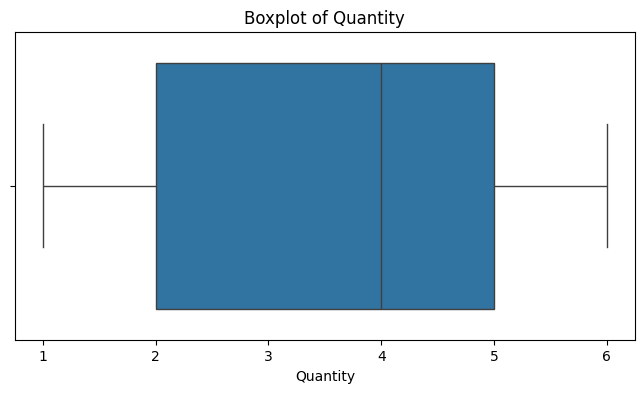

In [133]:
for col in ['Quantity']:
    plt.figure(figsize = (8, 4))
    sns.boxplot(x = clean_coffee_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

There are no outliers in the Quantity of orders!

#### Size

The Size of the coffee bean is categorical in nature, it doesn't matter if there are outliers.

In [134]:
sizes = clean_coffee_df['Size'].unique()
print(sorted(sizes))

[np.float64(0.2), np.float64(0.5), np.float64(1.0), np.float64(2.5)]


Moving on... ☕

#### Unit Price, Price per 100g, and Profit

There is a limited number of coffee beans, and it would greatly benefit us to not miss insights from any of them.

We shouldn't get rid of any price or profit outliers because some coffee beans are just naturally expensive.

Let's use boxplots again.

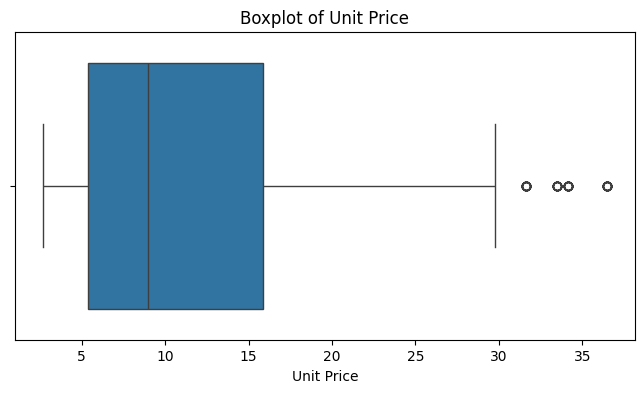

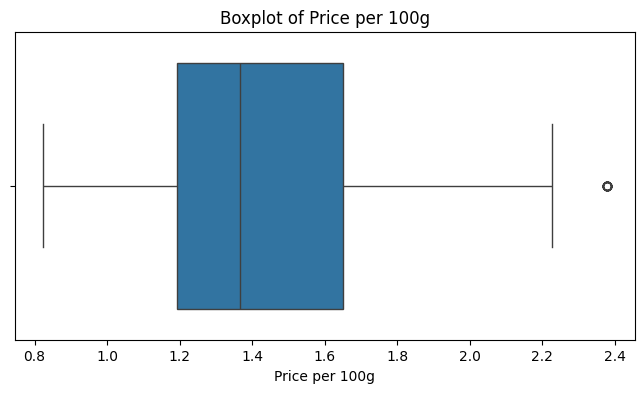

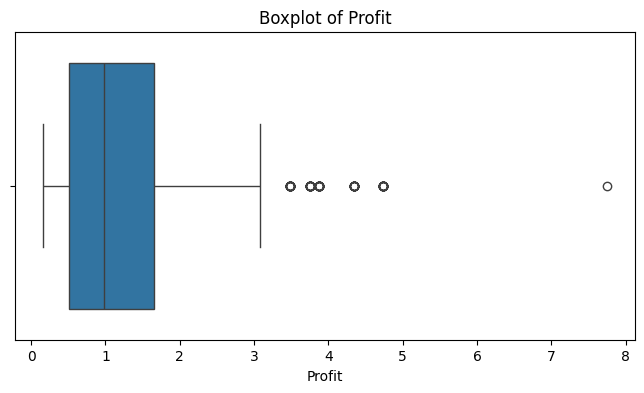

In [135]:
for col in ['Unit Price', 'Price per 100g', 'Profit']:
    plt.figure(figsize = (8, 4))
    sns.boxplot(x = clean_coffee_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

It doesn't seem like there are any genuine mistakes. All good here!

### Others

For marketing purposes, we might benefit from extracting the following variables from existing ones:
- First Name (from Customer Name)
- Last Name (from Customer Name)
- Unit (from Address Line 1)
- Street (from Address Line 1)

First names can be used to personalize newsletters and emails. Having last names also makes sorting and filtering much easier.

Given that all the names are made in first name + last name format, it is much better to do so. Otherwise, inconsistent formatting would make this much harder.

Go ahead and run the block of code below to split the Customer Name into the First Name and Last Name variables.

In [136]:
# Splitting First and Last Names
split_names = clean_coffee_df['Customer Name'].str.strip().str.split(' ', n = 1, expand = True)
split_names.columns = ['First Name', 'Last Name']

# Dropping the original Customer Name column
clean_coffee_df = clean_coffee_df.drop(columns = ['Customer Name'])

# Inserting the First and Last Names column where Customer Name was
columns = list(clean_coffee_df.columns)
insert_loc = columns.index('Email')
clean_coffee_df.insert(insert_loc, 'First Name', split_names['First Name'])
clean_coffee_df.insert(insert_loc + 1, 'Last Name', split_names['Last Name'])

clean_coffee_df.head()

,Order ID,Product ID,Quantity,Profit,Customer ID,First Name,Last Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Order Date
0,AAQ-13644-699,R-D-1,4,0.53700,46296-42617-OQ,Fernando,Sulman,fsulmanl0@washington.edu,+1 (828) 464-2678,45 Village Terrace,Asheville,United States,28805,True,Rob,D,1.0,8.950,0.895,2022-06-03
1,ABK-08091-531,L-L-1,3,2.06050,53864-36201-FG,Tess,Benediktovich,tbenediktovichmv@ebay.com,+1 (505) 523-8113,1068 Sutherland Plaza,Albuquerque,United States,87140,True,Lib,L,1.0,15.850,1.585,2020-10-30
2,ABO-29054-365,A-M-0.5,6,0.60750,00256-19905-YG,Stanislaus,Valsler,Unknown,+353 (479) 865-9222,95 Southridge Alley,Castlebridge,Ireland,R14,False,Ara,M,0.5,6.750,1.350,2019-01-19
3,ACY-56225-839,A-M-2.5,3,2.32875,47386-50743-FG,Kynthia,Berick,Unknown,+1 (562) 331-4713,1678 Armistice Alley,San Francisco,United States,94110,True,Ara,M,2.5,25.875,1.035,2021-01-28
4,ADP-04506-084,E-M-2.5,6,3.47875,61809-87758-LJ,Hatty,Dovydenas,Unknown,+1 (281) 416-9557,227 Huxley Hill,Amarillo,United States,79176,True,Exc,M,2.5,31.625,1.265,2021-07-24


Separating House Numbers and Street Name would make it much easier to filter, sort, and group customers based on their location which would help with location-specific promotions.

Like last time, run the block of code below in order to split the Adress Line 1 into the House Number and Street Name.

In [137]:
# Splitting House Number and Street Name
address_split = clean_coffee_df['Address Line 1'].str.extract(r'^\s*(\d+)\s+(.*)$')
address_split.columns = ['House Number', 'Street Name']

# Dropping the original Address Line 1 column
clean_coffee_df = clean_coffee_df.drop(columns=['Address Line 1'])

# Inserting the House Number and Street Name columns where Address Line 1 was
columns = list(clean_coffee_df.columns)
insert_loc = columns.index('City')
clean_coffee_df.insert(insert_loc, 'House Number', address_split['House Number'].fillna(''))
clean_coffee_df.insert(insert_loc + 1, 'Street Name', address_split['Street Name'].fillna(''))

clean_coffee_df.head()


,Order ID,Product ID,Quantity,Profit,Customer ID,First Name,Last Name,Email,Phone Number,House Number,...,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Order Date
0,AAQ-13644-699,R-D-1,4,0.53700,46296-42617-OQ,Fernando,Sulman,fsulmanl0@washington.edu,+1 (828) 464-2678,45,...,Asheville,United States,28805,True,Rob,D,1.0,8.950,0.895,2022-06-03
1,ABK-08091-531,L-L-1,3,2.06050,53864-36201-FG,Tess,Benediktovich,tbenediktovichmv@ebay.com,+1 (505) 523-8113,1068,...,Albuquerque,United States,87140,True,Lib,L,1.0,15.850,1.585,2020-10-30
2,ABO-29054-365,A-M-0.5,6,0.60750,00256-19905-YG,Stanislaus,Valsler,Unknown,+353 (479) 865-9222,95,...,Castlebridge,Ireland,R14,False,Ara,M,0.5,6.750,1.350,2019-01-19
3,ACY-56225-839,A-M-2.5,3,2.32875,47386-50743-FG,Kynthia,Berick,Unknown,+1 (562) 331-4713,1678,...,San Francisco,United States,94110,True,Ara,M,2.5,25.875,1.035,2021-01-28
4,ADP-04506-084,E-M-2.5,6,3.47875,61809-87758-LJ,Hatty,Dovydenas,Unknown,+1 (281) 416-9557,227,...,Amarillo,United States,79176,True,Exc,M,2.5,31.625,1.265,2021-07-24


And just in case, let's check whether any columns were formatted weirdly and resulted in unknown values.

In [138]:
clean_coffee_df[['First Name', 'Last Name', 'House Number', 'Street Name']].isna().sum()

First Name      0
Last Name       0
House Number    0
Street Name     0
dtype: int64

### The Cleaned Dataset

Our dataset is now squeaky clean! We can now proceed with analysis!

In [139]:
clean_coffee_df.head(20)

,Order ID,Product ID,Quantity,Profit,Customer ID,First Name,Last Name,Email,Phone Number,House Number,...,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Order Date
0,AAQ-13644-699,R-D-1,4,0.53700,46296-42617-OQ,Fernando,Sulman,fsulmanl0@washington.edu,+1 (828) 464-2678,45,...,Asheville,United States,28805,True,Rob,D,1.0,8.950,0.8950,2022-06-03
1,ABK-08091-531,L-L-1,3,2.06050,53864-36201-FG,Tess,Benediktovich,tbenediktovichmv@ebay.com,+1 (505) 523-8113,1068,...,Albuquerque,United States,87140,True,Lib,L,1.0,15.850,1.5850,2020-10-30
2,ABO-29054-365,A-M-0.5,6,0.60750,00256-19905-YG,Stanislaus,Valsler,Unknown,+353 (479) 865-9222,95,...,Castlebridge,Ireland,R14,False,Ara,M,0.5,6.750,1.3500,2019-01-19
3,ACY-56225-839,A-M-2.5,3,2.32875,47386-50743-FG,Kynthia,Berick,Unknown,+1 (562) 331-4713,1678,...,San Francisco,United States,94110,True,Ara,M,2.5,25.875,1.0350,2021-01-28
4,ADP-04506-084,E-M-2.5,6,3.47875,61809-87758-LJ,Hatty,Dovydenas,Unknown,+1 (281) 416-9557,227,...,Amarillo,United States,79176,True,Exc,M,2.5,31.625,1.2650,2021-07-24
5,ADX-50674-975,A-M-2.5,4,2.32875,58916-61837-QH,Freda,Hollows,fhollowsc8@blogtalkradio.com,+1 (716) 632-6865,353,...,Buffalo,United States,14205,True,Ara,M,2.5,25.875,1.0350,2021-02-03
6,AEL-51169-725,L-M-0.2,6,0.56745,37430-29579-HD,Eveleen,Bletsor,ebletsor8l@vinaora.com,+1 (860) 182-4246,9076,...,West Hartford,United States,6127,True,Lib,M,0.2,4.365,2.1825,2020-02-03
7,AEZ-13242-456,R-M-0.5,5,0.35820,62494-09113-RP,Marguerite,Graves,Unknown,+1 (479) 204-9111,91413,...,Fort Smith,United States,72905,False,Rob,M,0.5,5.970,1.1940,2022-05-04
8,AGQ-06534-750,A-L-1,5,1.16550,52798-46508-HP,Kevan,Grinsted,kgrinstedj4@google.com.br,+353 (773) 225-6216,3,...,Tallaght,Ireland,D24,False,Ara,L,1.0,12.950,1.2950,2019-04-24
9,AHQ-40440-522,A-D-1,1,0.89550,83833-46106-ZC,Martie,Brimilcombe,mbrimilcombele@cnn.com,+1,2260,...,Springfield,United States,22156,False,Ara,D,1.0,9.950,0.9950,2020-09-18


Always remember that data cleaning depends specifically on the context and use of the dataset. It can heavily affect and sway the results of analysis, so we must do it carefully. 📌

# Target Research Question 🔬✨

#### _`"How can we optimize business strategies by understanding the factors that affect sales?"`_

In order to provide scope, purpose, and clarity, the above question will serve as the main foundation of data analysis upon the Coffee Bean Sale Dataset. It will guide in identifying patterns, relationships, and key insights that can inform business decision-making to hopefully draw insights on the coffee bean industry.

# Exploratory Data Analysis 🔍✨

Now that the dataset has been cleaned, we can start exploring it to better understand its structure, contents, and patterns.

People tend to prefer certain flavors of coffee depending on the season like how Pumpkin Spice Lattes take over Autumn. By knowing which coffee beans and roasts are most profitable, we can make smarter decisions about stocks and promotions. This begs the question...

### _`"Which coffee bean and roast type is the most profitable per season?"`_ ⛅📈✨

To answer this question, the variables of interest are:
- **`Order Date`**: the date a order was placed
- **`Coffee Type`**: the blend or type of coffee (e.g., Arabica, Robusta, Liberica, Excelsa)
- **`Roast Type`**: the level of roast (e.g., light, medium, dark)
- **`Profit`**: the amount of profit from a sale
- **`Quantity`**: the number of units ordered

#### **Seasons**

Since the customers from the dataset are mostly from the the United States of America, we will be using the seasons from that country. The seasons are specifically **winter**, **spring**, **summer** and **fall** and they will be derived from the `Order Date`.

In [140]:
# Assigning the seasons based on the month
def get_season(date) :
    month = date.month
    if month in [3, 4, 5] : return 'Spring'
    elif month in [6, 7, 8] : return 'Summer'
    elif month in [9, 10, 11] : return 'Fall'
    else: return 'Winter'

clean_coffee_df['Season'] = clean_coffee_df['Order Date'].apply(get_season)
clean_coffee_df[['Order Date', 'Season']].head()

,Order Date,Season
0,2022-06-03,Summer
1,2020-10-30,Fall
2,2019-01-19,Winter
3,2021-01-28,Winter
4,2021-07-24,Summer


#### **Total Quantity Sold For Each Coffee Type per Season**

In order to understand the seasonal demands per coffee type (e.g., Arabica, Robusta), we will compute the total quantity sold for each coffee type per season. This will help us identify the coffee type that is most preferred during each season.

In [141]:
# Grouping by season and coffee type and summing up the quantity
coffee_total_quantity = clean_coffee_df.groupby(['Season', 'Coffee Type'])['Quantity'].sum().reset_index()

# Sorting the seasons in ascending order and quantity in descending order
coffee_total_quantity = coffee_total_quantity.sort_values(['Season', 'Quantity'], ascending=[True, False])

print("Total Quantity Sold For Each Coffee Type per Season:\n")
print(coffee_total_quantity)

Total Quantity Sold For Each Coffee Type per Season:

    Season Coffee Type  Quantity
0     Fall         Ara       233
2     Fall         Lib       222
3     Fall         Rob       191
1     Fall         Exc       163
7   Spring         Rob       254
5   Spring         Exc       250
6   Spring         Lib       234
4   Spring         Ara       233
8   Summer         Ara       247
11  Summer         Rob       247
9   Summer         Exc       227
10  Summer         Lib       151
14  Winter         Lib       247
12  Winter         Ara       234
13  Winter         Exc       232
15  Winter         Rob       186


During the **Fall** and **Summer**, the most sold coffee type for both seasons is **Arabica**, with a quantity of **233** and **247** units sold, respectively. During the **Spring**, the most sold coffee type is **Robusta**, with a quantity of **254** units sold. Lastly, during the **Winter**, the most sold coffee type is **Liberica**, with a quantity of **247** units sold. 

#### **Total Quantity Sold For Each Roast Type per Season**

In order to understand the seasonal demands per roast type (e.g., light, medium, dark), we will compute the total quantity sold for each roast type per season. This will help us identify the roast type that is most preferred during each season.

In [142]:
# Grouping by season and roast type and summing up the quantity
roast_total_quantity = clean_coffee_df.groupby(['Season', 'Roast Type'])['Quantity'].sum().reset_index()

# Sorting the seasons in ascending order and quantity in descending order
roast_total_quantity = roast_total_quantity.sort_values(['Season', 'Quantity'], ascending=[True, False])

print("Total Quantity Sold For Each Roast Type per Season:\n")
print(roast_total_quantity)

Total Quantity Sold For Each Roast Type per Season:

    Season Roast Type  Quantity
2     Fall          M       309
0     Fall          D       250
1     Fall          L       250
4   Spring          L       364
5   Spring          M       328
3   Spring          D       279
6   Summer          D       311
7   Summer          L       301
8   Summer          M       260
9   Winter          D       316
10  Winter          L       315
11  Winter          M       268


During the **Winter** and **Summer**, the most sold roast type for both seasons is **dark**, with a quantity of **316** and **311** units sold, respectively. During the **Fall**, the most sold roast type is **medium**, with a quantity of **309** units sold. Lastly, during the **Spring**, the most sold roast type is **light**, with a quantity of **364** units sold. 

#### **Top Quantity Sold For Each Coffee and Roast Type Combination per Season**


In order to be a step closer to identifying what coffee and roast type is the most profitable per season, we will compute for the most quantity sold coffee and roast type combination per season. This will help us compare which coffee and roast type combination is the most sold and the most profitable during each season.

In [143]:
# Grouping by season, coffee type, and roast type and summing up the quantity
combination_quantity = clean_coffee_df.groupby(['Season', 'Coffee Type', 'Roast Type'])['Quantity'].sum().reset_index()

# Sorting and retrieving the top selling combination per season
top_combination_quantity = combination_quantity.sort_values(['Season', 'Quantity'], ascending=[True, False]) \
                                   .groupby('Season').first().reset_index()

print("Top Quantity Sold for Each Coffee and Roast Type per Season:\n")
print(top_combination_quantity)

Top Quantity Sold for Each Coffee and Roast Type per Season:

   Season Coffee Type Roast Type  Quantity
0    Fall         Ara          M        98
1  Spring         Exc          L       106
2  Summer         Rob          D       110
3  Winter         Ara          M        98


During both the **Fall** and **Winter**, the most sold combination is **Arabica Medium Roast**, both having a quantity of **98** units sold. During the **Spring**, the most sold combination is **Excelsa Light Roast**, with a quantity of **106** units sold. During the **Summer**, the most sold combination is **Robusta Dark Roast**, with a quantity of **110** units sold.


#### **Most Profitable Coffee and Roast Type per Season**

In order to answer our main EDA question of determining which coffee bean and roast type is the most profitable per season is, we will get the total profit of each season, coffee and roast type group and retreieve the combinations with the highest total profit.


In [144]:
# Getting the total profit by multiplying quantity and profit
clean_coffee_df['Total Profit'] = clean_coffee_df['Quantity'] * clean_coffee_df['Profit']

# Grouping by season, coffee type, and roast type and then summing up the total profit for each group
combination_season_profit = clean_coffee_df.groupby(['Season', 'Coffee Type', 'Roast Type'])['Total Profit'].sum().reset_index()

# the coffee and roast type combination with the highest total profit appears first
top_combination_per_season = combination_season_profit.sort_values(['Season', 'Total Profit'], ascending=[True, False]).groupby('Season').first().reset_index()

print(top_combination_per_season)

   Season Coffee Type Roast Type  Total Profit
0    Fall         Lib          D      168.6867
1  Spring         Lib          L      202.3411
2  Summer         Exc          M      167.8875
3  Winter         Lib          D      158.2490


The most profitable coffee and roast type combination during the **Fall** is **Liberica Dark Roast** in contrast to **Arabica Medium Roast** having the most quantity sold. The most profitable combination during **Spring** is **Liberica Light Roast** in contrast to **Excelsa Light Roast** having the most quantity sold. The most profitable combination during **Summer** is **Excelsa Medium Roast** in contrast to **Robusta Dark Roast** having the most quantity sold. Lastly, the most profitable combination during **Winter** is **Liberica Dark Roast** in contrast to **Arabica Medium Roast** having the most quantity sold.


#### **Which season has the highest overall coffee sales profit?**

Identifying the season with the highest overall coffee sales profit will help us understand which season generates the most coffee sales. By analyzing seasonal trends, businesses can better anticipate coffee demand and maximize profitability.


In [145]:
# Grouping by season and summing up total profit
season_profit = clean_coffee_df.groupby('Season')['Total Profit'].sum()

# Sorting the profit per season in descending order
season_profit_sorted = season_profit.sort_values(ascending=False)

print("Total Profit per Season:")
for season, profit in season_profit_sorted.items():
    print(f"{season}: ${'{:.2f}'.format(profit)}")

top_season = season_profit_sorted.idxmax()

print(f"\nSeason with the highest profit: {top_season}")

Total Profit per Season:
Spring: $1272.05
Fall: $1103.51
Winter: $1096.77
Summer: $1067.24

Season with the highest profit: Spring


The season that gives the highest overall coffee sales profit is **Spring** with a total profit of **$1,272.05**. The season with the least overall coffee sales profit is **Summer**.

#### **Visualization**

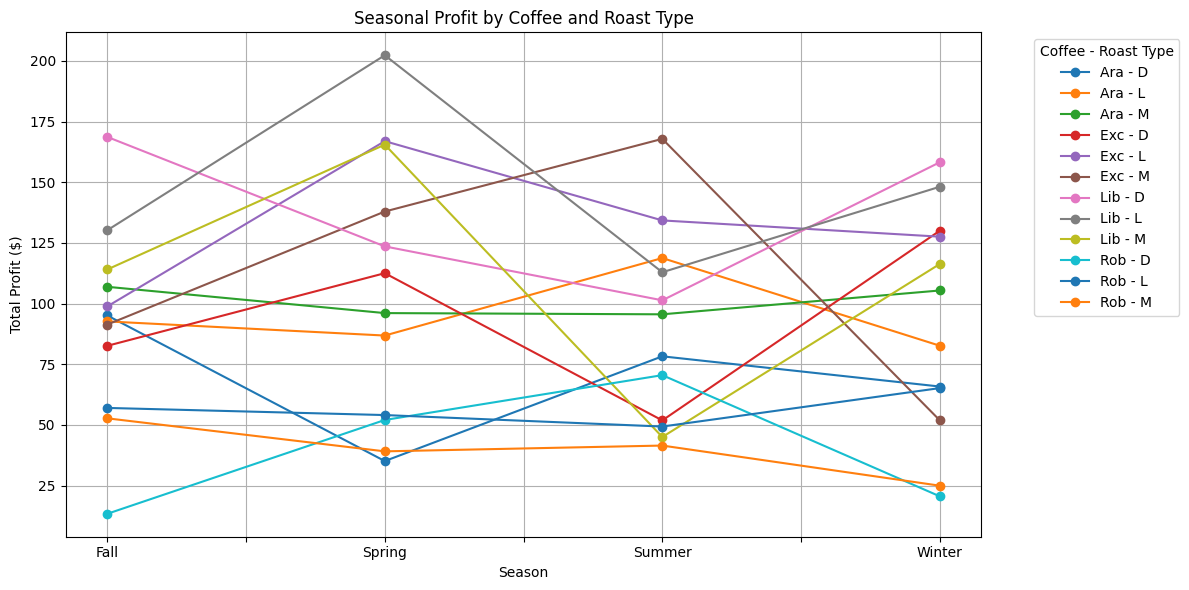

In [146]:
# Grouping by season, coffee and roast type to get total profit
profit_per_combo = clean_coffee_df.groupby(['Season', 'Coffee Type', 'Roast Type'])['Total Profit'].sum().reset_index()

# Creating a column for combining coffee and roast type
profit_per_combo['CoffeeRoast'] = profit_per_combo['Coffee Type'].astype(str) + ' - ' + profit_per_combo['Roast Type'].astype(str)

pivot_df = profit_per_combo.pivot(index='Season', columns='CoffeeRoast', values='Total Profit')

pivot_df.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Seasonal Profit by Coffee and Roast Type")
plt.xlabel("Season")
plt.ylabel("Total Profit ($)")
plt.grid(True)
plt.legend(title="Coffee - Roast Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Figure 1. Line Chart of Seasonal Profits by Coffee and Roast Type**

The line chart shows the total profit made by each coffee and roast type combination on the y-axis. The four seasons are shown on the y-axis and a legend for each combination is shown on the upper right part of the figure.

The figure reflects the profitability of each coffee and roast type per season and as seen, **Spring** is the season  that gives the combination (**Liberica Light Roast**) with the highest total profit.

### _`"How does loyalty card ownership influence customer purchasing behavior?"`_ 🧑💳✨

This analysis explores whether loyalty card ownership has an influence on customer purchasing behavior.  Specifically, we investigate whether there is a statistically significant difference in the number of coffee bean units ordered by customers who have a loyalty card compared to those who do not.

To do this, we focus on two variables:

- **`Loyalty Card`**: From the `customers` dataset, indicating whether a customer has a loyalty card (True or False).
- **`Quantity`**: From the `orders` dataset, representing how many units of coffee beans were ordered.

#### **Group by Ownership**

We then divide the dataset into two groups based on loyalty card status:
- `owners`: Customers who have a loyalty card (Loyalty Card == True)
- `non_owners`: Customers who do not have a loyalty card (Loyalty Card == False)

In [147]:
owners = clean_coffee_df[clean_coffee_df['Loyalty Card'] == True]['Quantity']
non_owners = clean_coffee_df[clean_coffee_df['Loyalty Card'] == False]['Quantity']

ownership_table = pd.DataFrame({
    'Loyalty Card Owners': owners.reset_index(drop = True),
    'Non-Owners': non_owners.reset_index(drop = True)
})

ownership_table

,Loyalty Card Owners,Non-Owners
0,4.0,6
1,3.0,5
2,3.0,5
3,6.0,1
4,4.0,2
...,...,...
515,NaN,6
516,NaN,2
517,NaN,3
518,NaN,5


To assess the relationship, we use an **Independent Samples T-test**, which allows us to compare the means of two groups and determine whether any observed difference is statistically significant.

Before conducting the test, we define our hypotheses:

#### **Hypothesis Testing (T-test)**
**Null Hypothesis (H₀)**: Loyalty card ownership does not influence purchasing behavior.

**Alternative Hypothesis (Hₐ)**: Loyalty card ownership does influence purchasing behavior.

We will use an independent samples T-test to determine if the difference in purchasing behavior between loyalty card owners and non-owners is statistically significant based on the T-statistic and p-value.

In [148]:
t_stat, p_value = ttest_ind(owners, non_owners, equal_var=False)

print(f"Owners Mean Quantity (True): {owners.mean():.2f}")
print(f"Non-Owners Mean Quantity (False): {non_owners.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Owners Mean Quantity (True): 3.48
Non-Owners Mean Quantity (False): 3.63
T-statistic: -1.4161
P-value: 0.1571


The average quantity ordered by **loyalty card owners** is **3.48**, while **non-owners** order an average of **3.63**.

The **T-statistic** is **-1.4161**, and the **p-value** is **0.1571**, which is greater than **0.05**. This means the result is **not statistically significant**. 

Therefore, we **fail to reject the null hypothesis**.

#### **Dot Plot**

The dot plot below further illustrates this relationship.

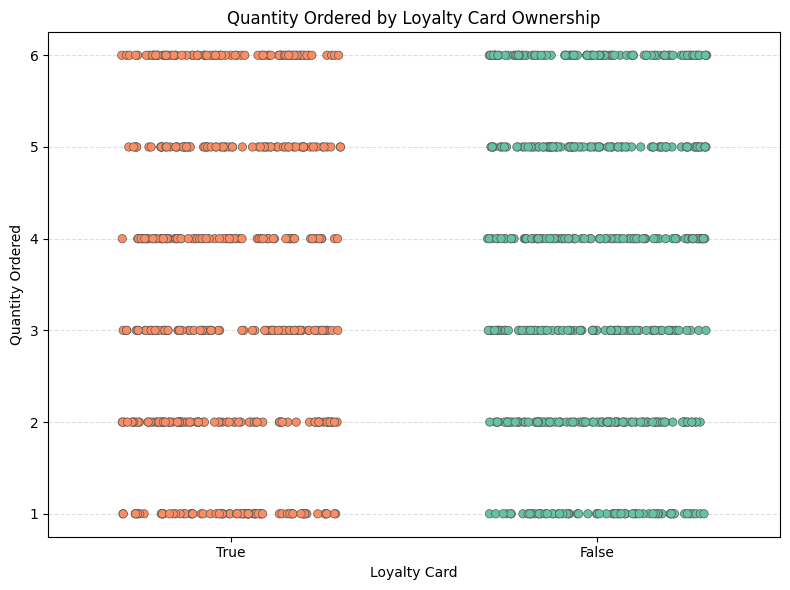

In [149]:
plt.figure(figsize = (8, 6))
sns.stripplot(
    data = clean_coffee_df,
    x = 'Loyalty Card',
    y = 'Quantity',
    hue = 'Loyalty Card',    
    order = [True, False],    
    legend = False,             
    jitter = 0.3,
    size = 6,
    marker = 'o',
    edgecolor = 'auto',
    linewidth = 0.5,
    palette = 'Set2'
)

plt.title('Quantity Ordered by Loyalty Card Ownership')
plt.xlabel('Loyalty Card')
plt.ylabel('Quantity Ordered')
plt.grid(True, axis = 'y', linestyle = '--', alpha = 0.4)

plt.tight_layout()
plt.show()

**Figure 2. Dot Plot of Quantity of Orders based on Loyalty Card Ownership**

The dot plot shows the distribution of coffee bean quantities ordered by customers, grouped by loyalty card ownership. Each dot represents a single transaction, with the quantity ordered on the y-axis and the loyalty card status on the x-axis.

As seen in the figure, loyalty card owners and non-owners display similar ordering patterns. This diagram aligns with the t-test results, which show no significant difference in mean quantity ordered between the groups (t = -1.4161, p = 0.1571).

📌 **Conclusion**: There is no statistically significant evidence that loyalty card ownership influences the quantity of coffee beans ordered.

While our initial analysis suggests that loyalty card ownership does not significantly affect overall purchasing behavior,  it does not directly answer whether those with loyalty cards tend to order larger quantities of coffee beans. A customer may still purchase larger quantites in order.

To further investigate this, we now ask:

**Do loyalty card owners order in larger quantities of coffee beans compared to non-owners?**

To answer this question, we use the same variables from the previous analysis:
- **`Loyalty Card`**: From the `customers` dataset, indicating whether a customer has a loyalty card (True or False).
- **`Quantity`**: From the `orders` dataset, representing how many units of coffee beans were ordered.

We will also use the same groupings from the initial analysis:
- `owners`: Customers who have a loyalty card (Loyalty Card == True)
- `non_owners`: Customers who do not have a loyalty card (Loyalty Card == False)

To investigate this, we will conduct a **One-tailed Independent Samples T-test** to determine if loyalty card owners purchase in larger amounts compared to non-owners.

Before conducting the test, we define our hypotheses:

**Null Hypothesis (H₀)**: Loyalty card owners do not order in larger quantities than non-owners (μ₁ ≤ μ₂).

**Alternative Hypothesis (Hₐ)**: Loyalty card owners order in larger quantities than non-owners (μ₁ > μ₂).

We will use a One-tailed Independent Samples T-test to determine if loyalty card owners order significantly more coffee beans than non-owners, based on the T-statistic and p-value.

In [150]:
t_stat, p_value_two_tailed = ttest_ind(owners, non_owners, equal_var=False)
p_value_one_tailed = p_value_two_tailed / 2

print(f"Owners Mean Quantity (True): {owners.mean():.2f}")
print(f"Non-Owners Mean Quantity (False): {non_owners.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"One-tailed P-value: {p_value_one_tailed:.4f}")

Owners Mean Quantity (True): 3.48
Non-Owners Mean Quantity (False): 3.63
T-statistic: -1.4161
One-tailed P-value: 0.0785


The **One-tailed p-value** is **0.0785**, which is greater than **0.05**. This means the result is **not statistically significant**. 

Therefore, we **fail to reject the null hypothesis**.

This relationship is also shown in the bar plot below.

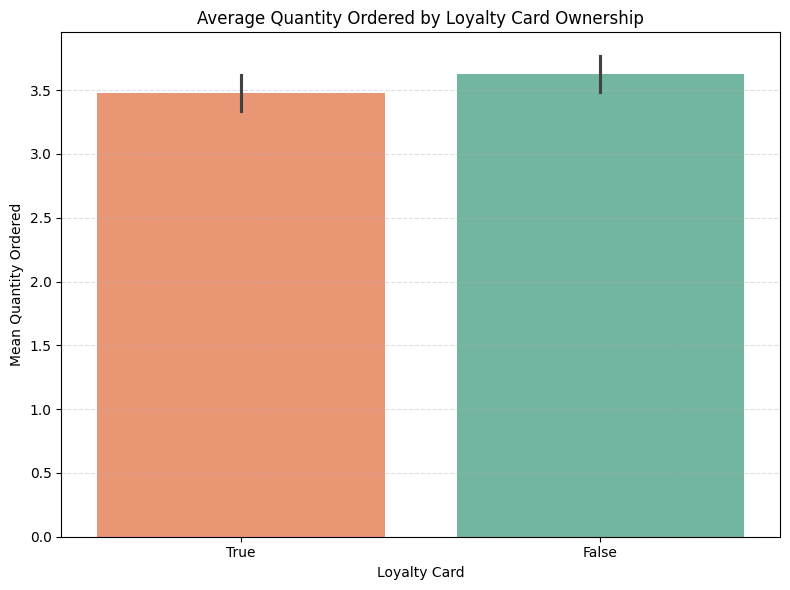

In [151]:
plt.figure(figsize = (8, 6))
sns.barplot(
    data = clean_coffee_df,
    x = 'Loyalty Card',
    y = 'Quantity',
    hue = 'Loyalty Card',   
    order = [True, False],  
    palette = 'Set2',
    legend = False          
)
plt.title("Average Quantity Ordered by Loyalty Card Ownership")
plt.xlabel("Loyalty Card")
plt.ylabel("Mean Quantity Ordered")
plt.grid(True, axis = 'y', linestyle = '--', alpha = 0.4)
plt.tight_layout()
plt.show()

**Figure 3. Bar Chart of Average Quantities Ordered based on Loyalty Card Ownership**

The bar plot displays the average quantity of coffee beans ordered by customers, grouped by loyalty card ownership. Each bar represents the mean quantity ordered for each group.

As shown above, loyalty card owners do not appear to order larger quantities than non-owners. It supports the one-tailed t-test result, which found no significant evidence to support the claim that loyalty card owners order in greater quantities (t = -1.4161, one-tailed p = 0.0785).

📌 **Conclusion**: There is insufficient evidence to conclude that loyalty card owners order in larger quantities of coffee beans compared to non-owners.

### _`"Do the coffee products with higher unit prices generate more profit?"`_ ☕💰✨

In this analysis, we aim to determine whether there is a statistical relationship between the **unit price** of coffee products and their **total profit**. Specifically, we want to know if products with higher prices tend to generate more profit.


To answer this question, we focus on the following variables from the `products` dataset:

- **`Unit Price`**: The retail price per unit of each coffee product.
- **`Profit`**: The total profit associated with each product.

To assess this, we will use the **Pearson correlation coefficient**, which measures the strength and direction of a linear relationship between two continuous variables.

Before conducting the test, we define our hypotheses:

**Null Hypothesis (H₀)**: There is no linear correlation between unit price and profit.  
**Alternative Hypothesis (Hₐ)**: There is a significant linear correlation between unit price and profit.

We will calculate the Pearson correlation coefficient and interpret both the correlation value and the associated p-value to determine if the result is statistically significant.

In [152]:
corr, p_value = pearsonr(products['Unit Price'], products['Profit'])

print(f"Pearson correlation: {corr:.3f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation: 0.939
P-value: 0.0000


The Pearson correlation coefficient between **Unit Price** and **Profit** is **0.939**, indicating a **very strong positive linear relationship**. 

Additionally, the **p-value is less than 0.05** (p = 0.0000), which means the result is **statistically significant**. Therefore, we **reject the null hypothesis**.

The following scatterplot further illustrates this relationship.

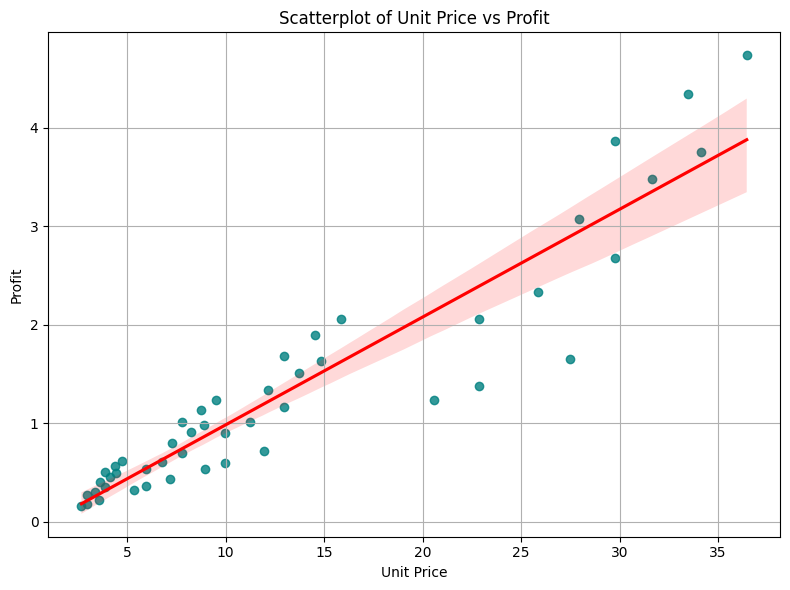

In [153]:
plt.figure(figsize=(8, 6))
sns.regplot(data=products, x='Unit Price', y='Profit', color='teal', line_kws={"color": "red"})

plt.title('Scatterplot of Unit Price vs Profit')
plt.xlabel('Unit Price')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

**Figure 4. Scatterplot of Unit Price and Profit**  
The scatterplot displays the relationship between **Unit Price** and **Profit** for each coffee product in the dataset. Each teal point represents a product, with its unit price on the x-axis and the corresponding profit on the y-axis.

The red regression line illustrates the overall linear trend. As shown, products with higher unit prices tend to generate higher profits, confirming the positive relationship observed in the Pearson correlation analysis (r = 0.939, p < 0.001).

📌 **Conclusion**: There exists a statistically significant linear correlation between unit price and profit among coffee products.

While our initial analysis shows a strong positive correlation between unit price and profit, this does not account for how well each product actually sells. High-priced items may yield high per-unit profits, but low sales volumes could limit their total profitability. To explore this further, we now ask:

**Do sales volumes influence total profit for higher-priced coffee products?**

To answer this question, we focus on the following variables:

- From the `products` dataset:
  - **Unit Price**: The retail price per unit of each coffee product.
  - **Profit**: The total profit associated with each product.
- From the `orders` dataset:
  - **Quantity**: The number of units ordered per product.

This analysis will help determine whether limited demand for expensive products affects their overall contribution to profit.

Before conducting the test, we define our hypotheses:


**Null Hypothesis (H₀)**: There is no significant linear correlation between sales volume (Quantity) and total profit for higher-priced coffee products.  
**Alternative Hypothesis (Hₐ)**: There is a significant linear correlation between sales volume (Quantity) and total profit for higher-priced coffee products.

We will calculate the Pearson correlation coefficient and evaluate the associated p-value. This will allow us to determine both the strength of the linear relationship and whether the result is statistically significant at the conventional 0.05 significance level.

We will use `clean_coffee_df`, a merged and cleaned dataset combining product and order details needed to compute total profit per product.

#### **Group by Product**

We group the merged data by each product to calculate:
- Total quantity sold
- Per-unit profit and unit price (from `products`)
- Total profit = Quantity × Profit

In [154]:
grouped = clean_coffee_df.groupby(['Product ID', 'Coffee Type', 'Roast Type']) \
    .agg({
        'Quantity': 'sum',
        'Profit': 'first',
        'Unit Price': 'first'
    }).reset_index()

grouped['Total Profit'] = grouped['Quantity'] * grouped['Profit']
grouped.head()

,Product ID,Coffee Type,Roast Type,Quantity,Profit,Unit Price,Total Profit
0,A-D-0.2,Ara,D,97,0.26865,2.985,26.05905
1,A-D-0.5,Ara,D,89,0.53730,5.970,47.81970
2,A-D-1,Ara,D,49,0.89550,9.950,43.87950
3,A-D-2.5,Ara,D,76,2.05965,22.885,156.53340
4,A-L-0.2,Ara,L,50,0.34965,3.885,17.48250


#### **Focus on High-Priced Products**

We define "high-priced" as products whose unit price falls in the top 25% of all products.

In [155]:
q3_price = grouped['Unit Price'].quantile(0.75)
high_priced = grouped[grouped['Unit Price'] >= q3_price]
high_priced.head()

,Product ID,Coffee Type,Roast Type,Quantity,Profit,Unit Price,Total Profit
3,A-D-2.5,Ara,D,76,2.05965,22.885,156.53340
7,A-L-2.5,Ara,L,86,2.68065,29.785,230.53590
11,A-M-2.5,Ara,M,97,2.32875,25.875,225.88875
15,E-D-2.5,Exc,D,66,3.07395,27.945,202.88070
19,E-L-2.5,Exc,L,72,3.75705,34.155,270.50760


#### **Correlation Analysis**

We calculate the Pearson correlation coefficient to assess the linear relationship between **quantity sold** and **total profit** for high-priced products.

In [156]:
corr, pval = pearsonr(high_priced['Quantity'], high_priced['Total Profit'])

print(f"Pearson correlation: {corr:.3f}")
print(f"P-value: {pval:.4f}")

Pearson correlation: 0.301
P-value: 0.3418


The Pearson correlation coefficient between **Quantity** and **Total Profit** for higher-priced products is **0.301**, indicating a **weak positive linear relationship**. 

However, the **p-value is greater than 0.05** (p = 0.3418), so the result is **not statistically significant**. Therefore, we **fail to reject the null hypothesis**.

#### **Visualization**

To visually support the correlation result, we generate a scatterplot with a regression line showing how quantity sold relates to total profit for high-priced products.

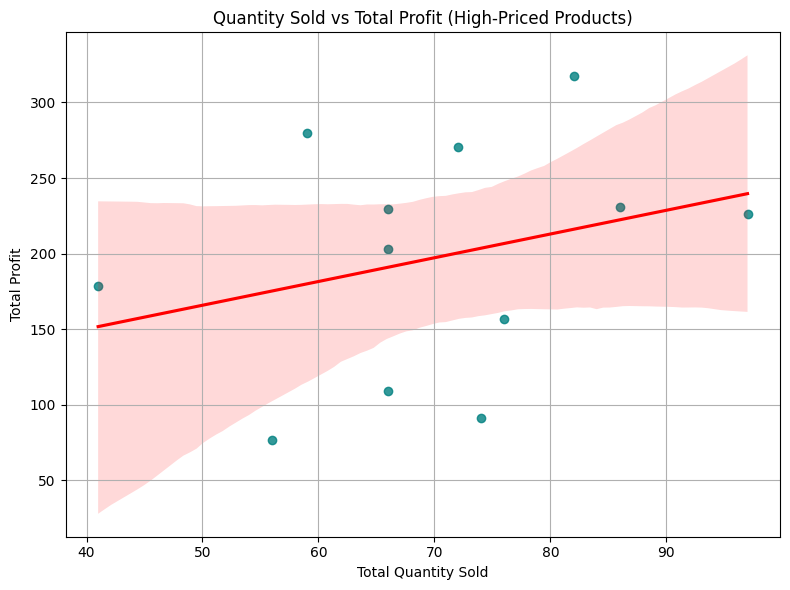

In [157]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=high_priced,
    x='Quantity',
    y='Total Profit',
    color='teal',
    line_kws={"color": "red"}
)

plt.title('Quantity Sold vs Total Profit (High-Priced Products)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

**Figure 5. Scatterplot based on Quantity Sold and Total Profit**  
The scatterplot illustrates the relationship between **quantity sold** and **total profit** for high-priced coffee products. Each teal point represents a product, where the x-axis shows the total number of units sold and the y-axis displays the corresponding total profit.

The red regression line represents the overall linear trend based on Pearson correlation analysis. While there is a slight upward trend, the distribution of points appears scattered, and no strong linear relationship is visually evident.

This aligns with the earlier statistical result (r = 0.301, p = 0.3418), suggesting that the correlation between sales volume and total profit among high-priced items is weak and not statistically significant. This indicates that simply pricing products higher does not guarantee greater overall profit if the products do not sell in large volumes.

📌 **Conclusion**: There is no statistically significant linear correlation between sales volume and total profit for high-priced coffee products.